In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_excel('D:\\Data-science\\EastWestAirlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [4]:
data.drop('ID#', axis=1, inplace=True)

In [5]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))  # Apply Z-score only to numeric columns
z_scores

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.451141,0.186299,0.769578,0.098242,0.062767,0.702786,1.104065,0.328603,0.362168,1.395454,0.766919
1,0.539457,0.186299,0.769578,0.098242,0.062767,0.701088,0.999926,0.328603,0.362168,1.379957,0.766919
2,0.320031,0.186299,0.769578,0.098242,0.062767,0.539253,0.791649,0.328603,0.362168,1.411920,0.766919
3,0.583799,0.186299,0.769578,0.098242,0.062767,0.689286,1.104065,0.328603,0.362168,1.372208,0.766919
4,0.239678,0.186299,1.409471,0.098242,0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.547079,0.186299,0.769578,0.098242,0.062767,0.356960,0.791649,0.185750,0.098503,1.315120,1.303918
3995,0.091465,0.186299,0.769578,0.098242,0.062767,0.669367,0.687511,0.328603,0.362168,1.318994,1.303918
3996,0.000043,0.186299,0.683121,0.098242,0.062767,0.343804,0.375096,0.328603,0.362168,1.315604,1.303918
3997,0.185607,0.186299,0.769578,0.098242,0.062767,0.689286,1.104065,0.028531,0.098503,1.316088,0.766919


In [10]:
data = data[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores are < 3
data['cc2_miles'].unique()

C:\Users\naveen.julla\AppData\Local\Temp\ipykernel_21208\3607355948.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores are < 3


array([1])

#### Pair Plots

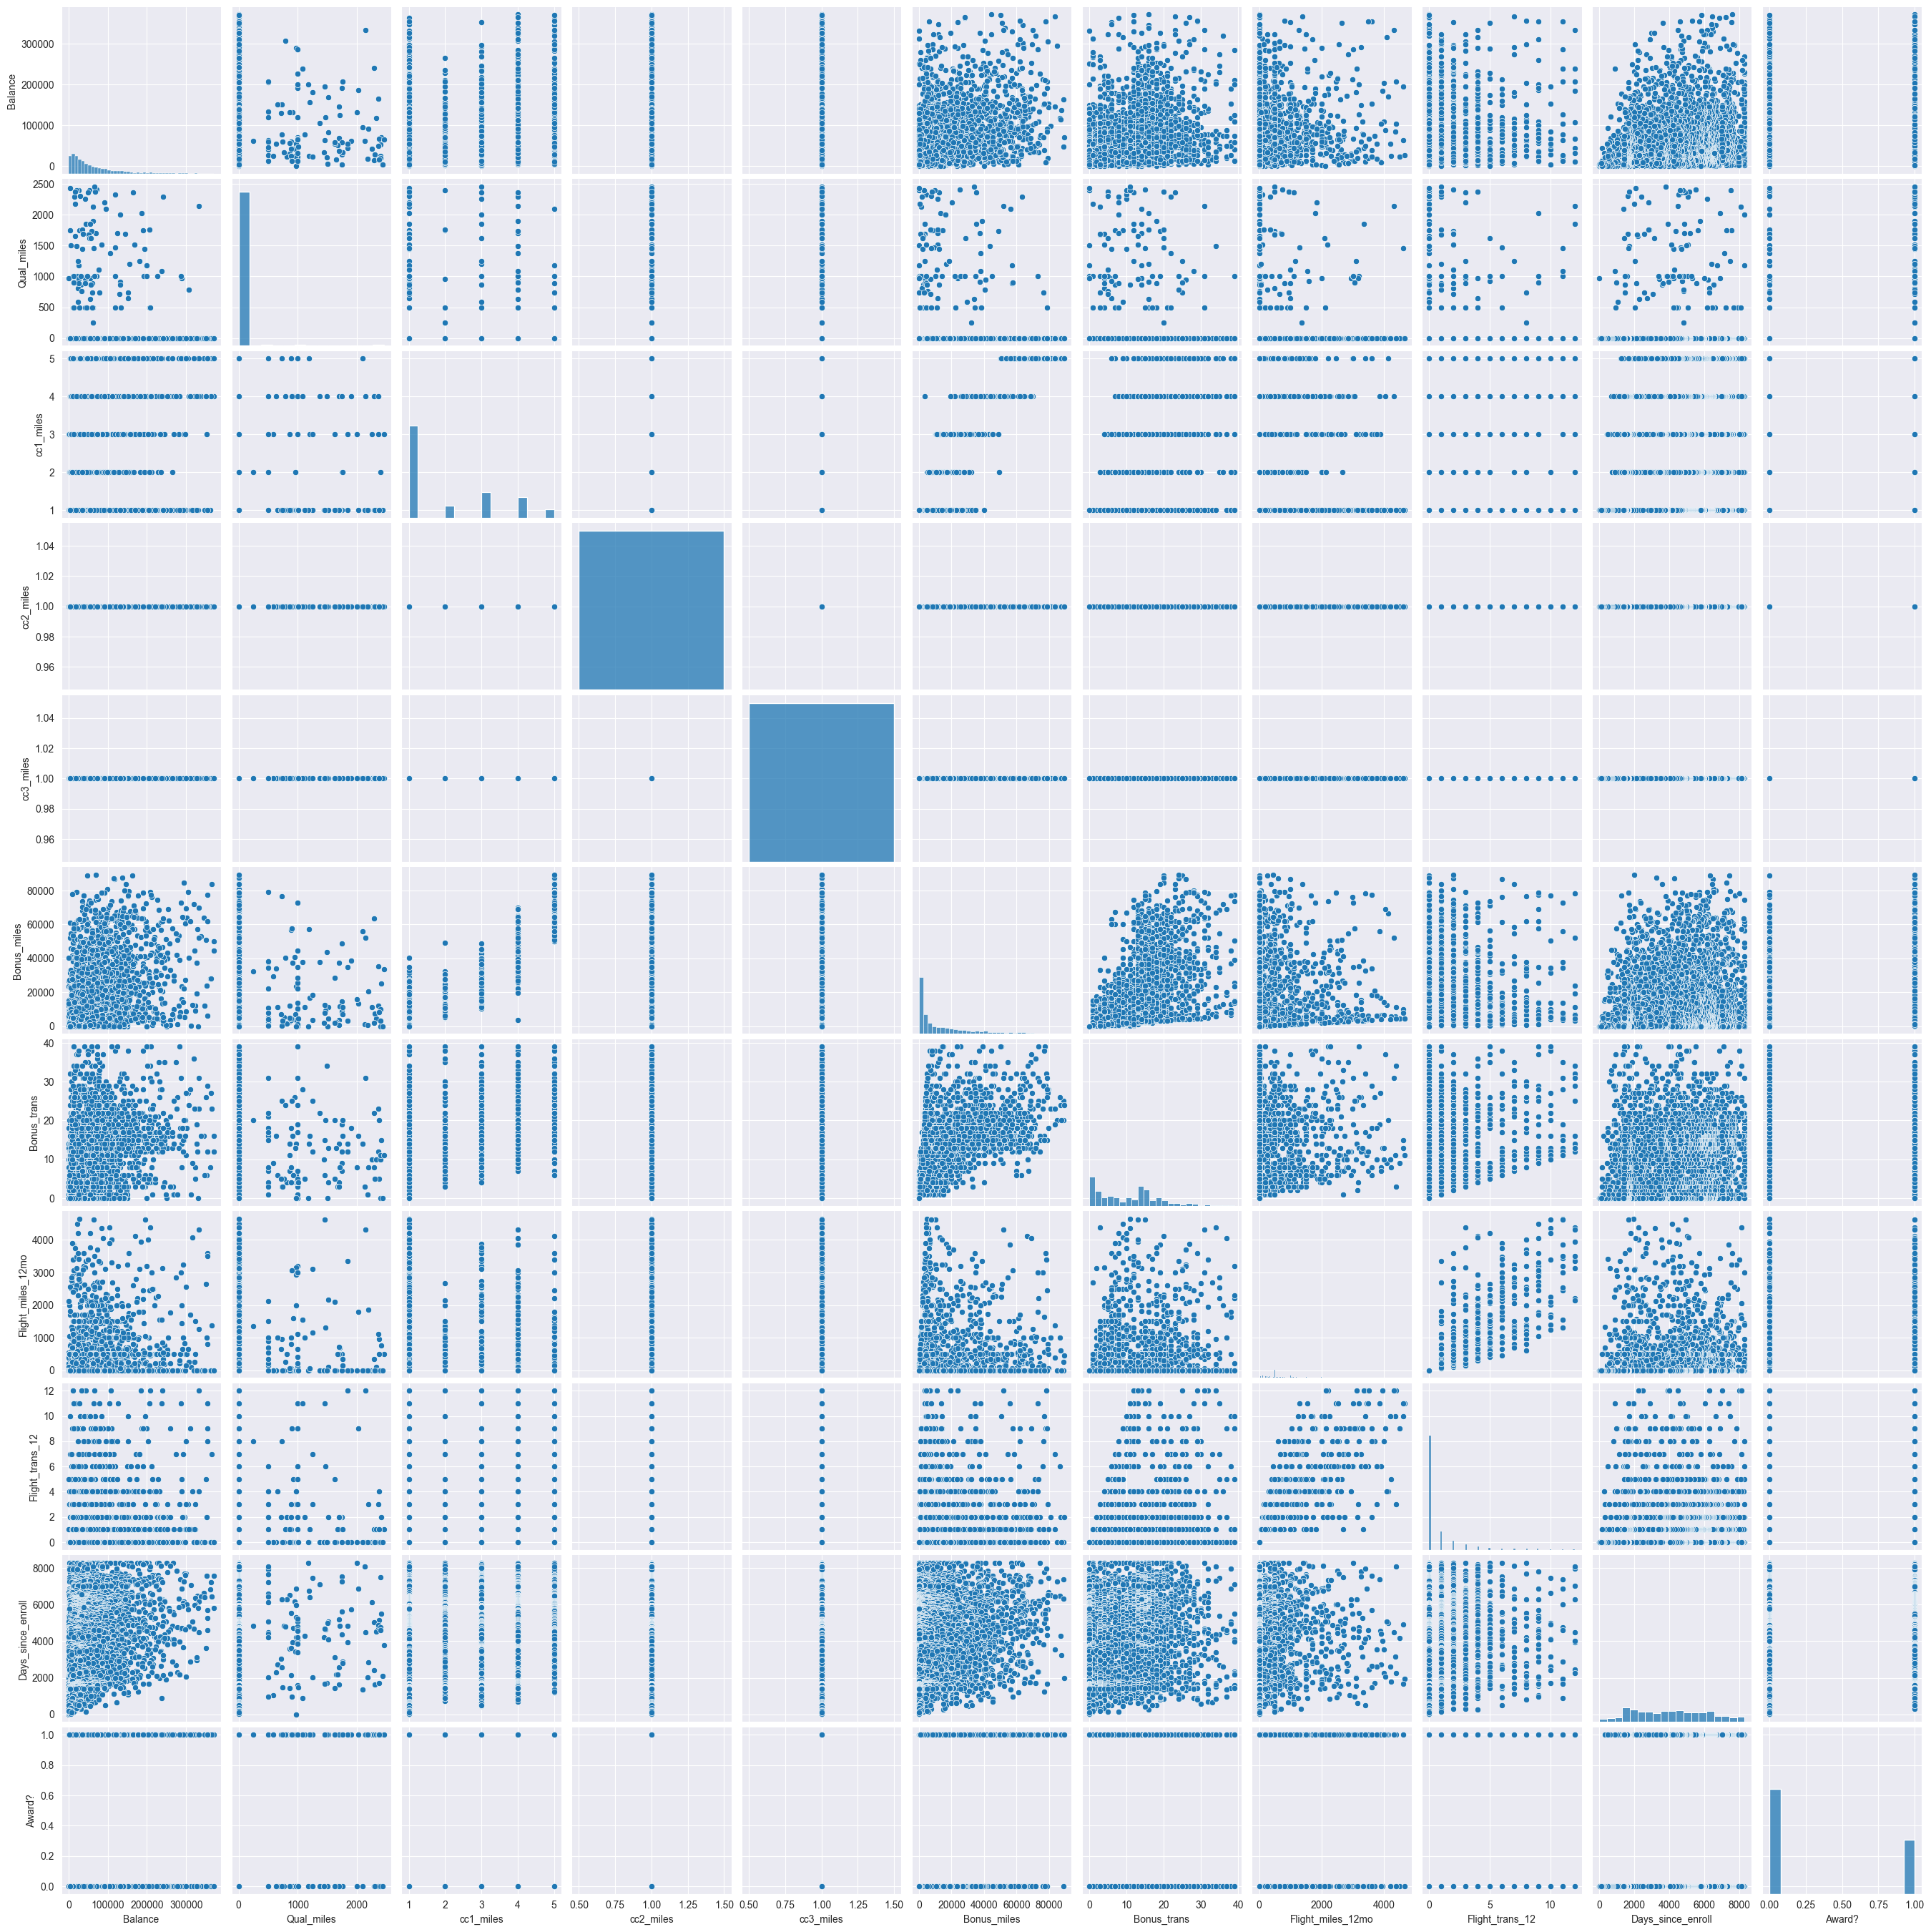

In [12]:
sns.pairplot(data)
plt.show()


In [10]:
data.drop('cc2_miles', axis=1, inplace=True)

In [11]:
data.drop('cc3_miles', axis=1, inplace=True)

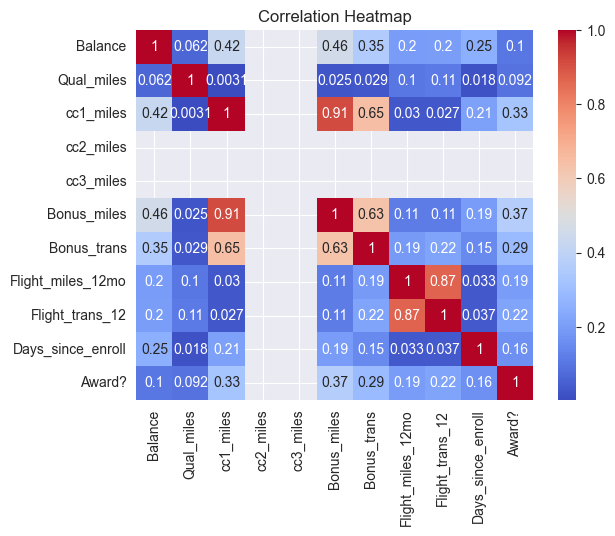

In [14]:
corre_data = data.corr()
sns.heatmap(corre_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### Implementing Clustering Algorithms:

In [15]:
X = StandardScaler().fit_transform(data) 
X# Standardizing the dataset

array([[-0.52326043, -0.15886912, -0.75566439, ..., -0.43177507,
         1.43143767, -0.71809304],
       [-0.66708419, -0.15886912, -0.75566439, ..., -0.43177507,
         1.41584783, -0.71809304],
       [-0.30974703, -0.15886912, -0.75566439, ..., -0.43177507,
         1.44800188, -0.71809304],
       ...,
       [ 0.21135753, -0.15886912,  0.75983933, ..., -0.43177507,
        -1.29581034,  1.3925772 ],
       [-0.0908356 , -0.15886912, -0.75566439, ...,  0.11817002,
        -1.29629752, -0.71809304],
       [-0.9293577 , -0.15886912, -0.75566439, ..., -0.43177507,
        -1.29775907, -0.71809304]])

In [41]:
#Build Cluster algorithm
from sklearn.cluster import KMeans, DBSCAN

kmean_data = data.copy()
model = KMeans(4, random_state=0)
model.fit(kmean_data)

KMeans(n_clusters=4, random_state=0)

In [17]:
model.labels_

array([0, 0, 0, ..., 3, 3, 0], dtype=int32)

In [18]:
kmean_data['cluster'] = model.labels_
kmean_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,3


In [19]:
#These are standardized values.
model.cluster_centers_

array([[1.94417853e+04, 2.77748031e+01, 1.38320210e+00, 1.00000000e+00,
        1.00000000e+00, 5.99123990e+03, 7.35065617e+00, 1.60906562e+02,
        5.07086614e-01, 3.61329501e+03, 2.84514436e-01],
       [1.32124886e+05, 5.38717435e+01, 2.95390782e+00, 1.00000000e+00,
        1.00000000e+00, 2.76785651e+04, 1.46212425e+01, 3.98541082e+02,
        1.19438878e+00, 4.80411623e+03, 4.08817635e-01],
       [2.43189868e+05, 9.01519608e+01, 2.99019608e+00, 1.00000000e+00,
        1.00000000e+00, 3.15193676e+04, 1.61862745e+01, 5.79024510e+02,
        1.71568627e+00, 5.21416176e+03, 4.60784314e-01],
       [6.56631536e+04, 4.45283757e+01, 2.47651663e+00, 1.00000000e+00,
        1.00000000e+00, 1.98152241e+04, 1.30958904e+01, 2.98849315e+02,
        9.17808219e-01, 4.30536204e+03, 3.86497065e-01]])

In [20]:
kmean_data['cluster'].value_counts()

cluster
0    1907
3    1021
1     498
2     204
Name: count, dtype: int64

In [21]:
kmean_data['cluster']=kmean_data['cluster'].replace(0, 'Cluster 1')
kmean_data['cluster']=kmean_data['cluster'].replace(1, 'Cluster 2')
kmean_data['cluster']=kmean_data['cluster'].replace(2, 'Cluster 3')
kmean_data['cluster']=kmean_data['cluster'].replace(3, 'Cluster 4')
kmean_data['cluster'].value_counts()

cluster
Cluster 1    1907
Cluster 4    1021
Cluster 2     498
Cluster 3     204
Name: count, dtype: int64

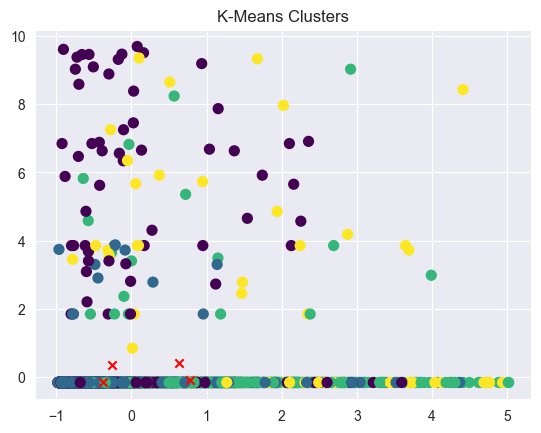

In [23]:
kmeans_labels = model.fit_predict(X)

# Visualizing K-Means Clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50, marker='o')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='x')
plt.title('K-Means Clusters')
plt.show()

#### Elbow Method to Choose k

In [24]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

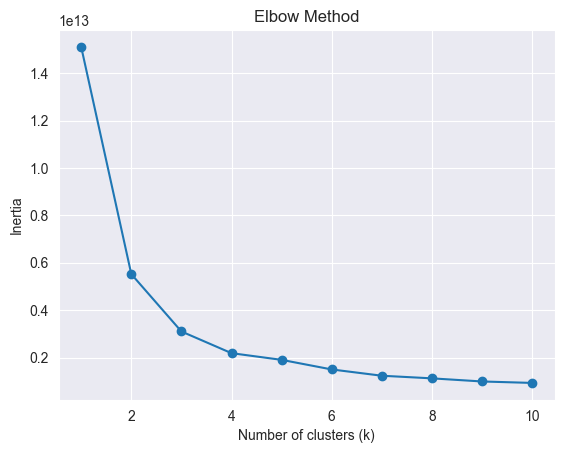

In [25]:
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [26]:
sil_score_kmeans = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score for K-Means: {sil_score_kmeans}")

Silhouette Score for K-Means: 0.28134976638266457


#### Hierarchical Clustering

In [29]:
z = linkage(X, method='ward')
z

array([[3.03800000e+03, 3.51500000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.40300000e+03, 2.40400000e+03, 3.18362633e-03, 2.00000000e+00],
       [2.49000000e+03, 2.92700000e+03, 3.53500119e-03, 2.00000000e+00],
       ...,
       [7.24600000e+03, 7.24800000e+03, 7.61289175e+01, 2.22000000e+02],
       [7.25400000e+03, 7.25600000e+03, 8.72614575e+01, 1.58500000e+03],
       [7.25500000e+03, 7.25700000e+03, 1.20029119e+02, 3.63000000e+03]])

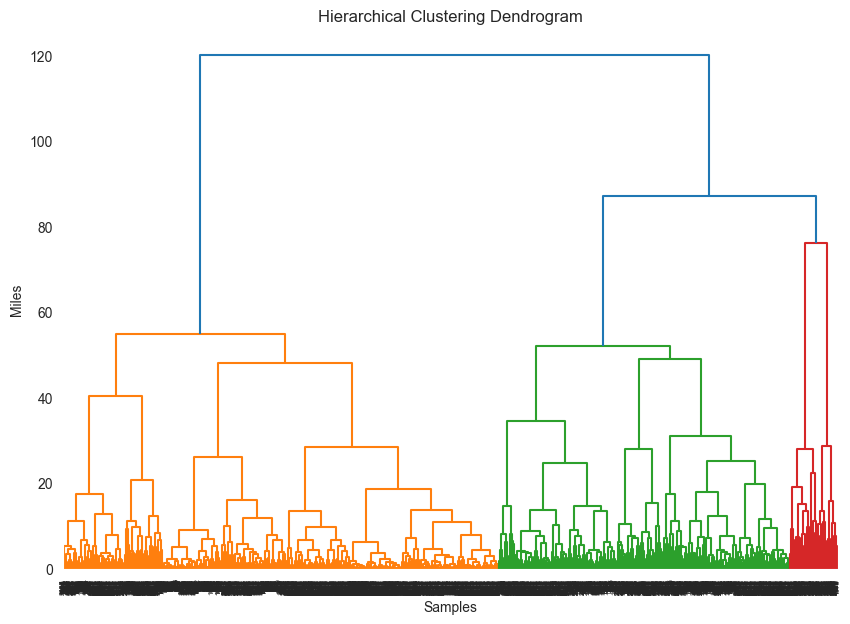

In [30]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 7))
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Miles')
plt.show()

In [33]:
from scipy.cluster.hierarchy import fcluster
labels_hierarchical = fcluster(z, t=4, criterion='maxclust') # t=4 for 4 clusters
labels_hierarchical

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

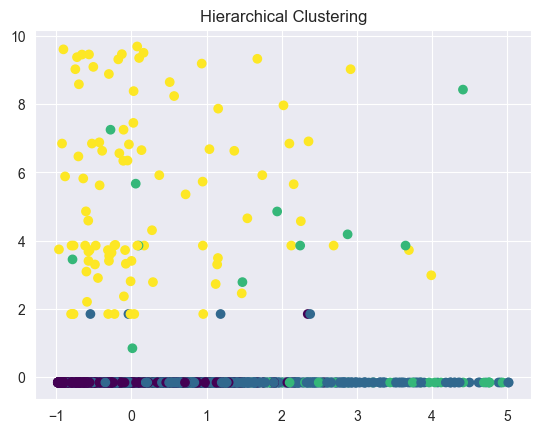

In [34]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels_hierarchical, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

In [35]:
# Evaluate using silhouette score
silhouette_avg_hierarchical = silhouette_score(X, labels_hierarchical)
print(f'Silhouette Score for Hierarchical: {silhouette_avg_hierarchical}')

Silhouette Score for Hierarchical: 0.29744887783615376


### DBSCAN Clustering

In [44]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
dbscan_labels

array([ 0,  0,  1, ..., -1, -1,  0])

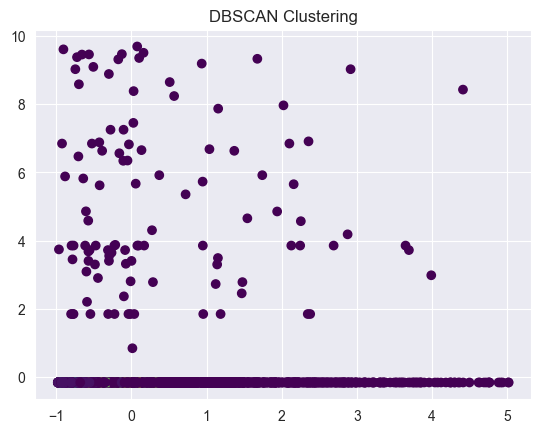

In [45]:
# Plot DBSCAN clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


In [46]:
# Evaluate using silhouette score (for non-noise points)
if len(set(dbscan_labels)) > 1:  # Ensure that there are more than one cluster
    silhouette_avg_dbscan = silhouette_score(X, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_avg_dbscan}')
else:
    print('DBSCAN found only one cluster or noise, cannot calculate silhouette score.')

Silhouette Score for DBSCAN: -0.4209584408718575


#### Experiment with different parameters

In [48]:
dbscan_1 = DBSCAN(eps=0.5, min_samples=5)
dbscan_2 = DBSCAN(eps=0.3, min_samples=10)

dbscan_labels_1 = dbscan_1.fit_predict(X)
dbscan_labels_2 = dbscan_2.fit_predict(X)


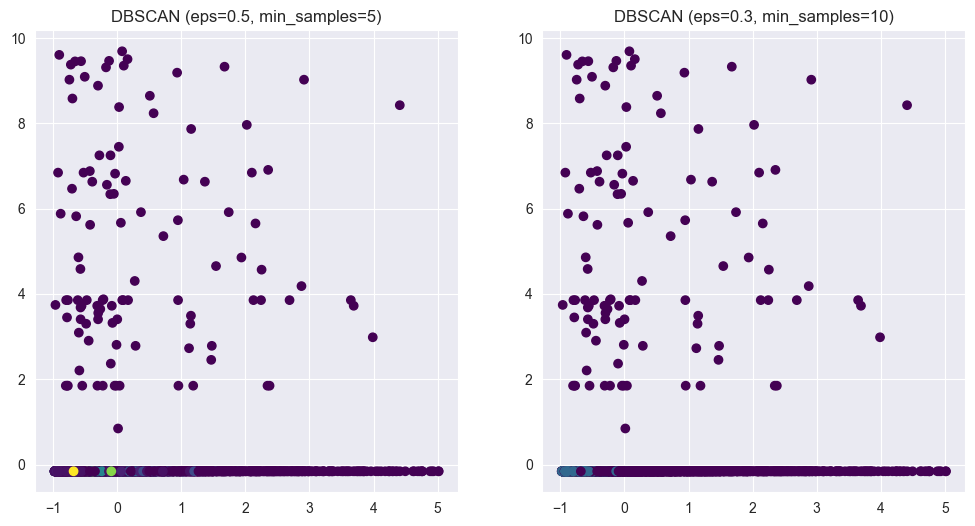

Silhouette Score for DBSCAN: -0.2868751166819865
Silhouette Score for DBSCAN: [ 0  0 -1 ... -1 -1  0]


In [50]:
# Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels_1, cmap='viridis')
plt.title('DBSCAN (eps=0.5, min_samples=5)')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels_2, cmap='viridis')
plt.title('DBSCAN (eps=0.3, min_samples=10)')

plt.show()

silhouette_avg_dbscan1 = silhouette_score(X, dbscan_labels_1)
print(f'Silhouette Score for DBSCAN: {silhouette_avg_dbscan1}')
silhouette_avg_dbscan2 = silhouette_score(X, dbscan_labels)
print(f'Silhouette Score for DBSCAN: {dbscan_labels_2}')

### Evaluate clustering results

In [51]:
print(f'Silhouette Score for K-Means: {sil_score_kmeans}')
print(f'Silhouette Score for hierarchical: {silhouette_avg_hierarchical}')
print(f'Silhouette Score for DBsCAN: {silhouette_avg_dbscan}')

Silhouette Score for K-Means: 0.28134976638266457
Silhouette Score for hierarchical: 0.29744887783615376
Silhouette Score for DBsCAN: -0.4209584408718575
